![headers_fraud-prev](headers_fraud-prev.jpg)


In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd

# Lectura de datos

In [3]:
import pandas as pd 
df = pd.read_csv('credit_card_fraud.csv') 
df.head(100)

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:44,"Heller, Gutmann and Zieme",grocery_pos,107.23,Orient,WA,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,49.159047,-118.186462,0
1,2019-01-01 00:00:51,Lind-Buckridge,entertainment,220.11,Malad City,ID,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,43.150704,-112.154481,0
2,2019-01-01 00:07:27,Kiehn Inc,grocery_pos,96.29,Grenada,CA,41.6125,-122.5258,589,Systems analyst,1945-12-21,413636e759663f264aae1819a4d4f231,41.657520,-122.230347,0
3,2019-01-01 00:09:03,Beier-Hyatt,shopping_pos,7.77,High Rolls Mountain Park,NM,32.9396,-105.8189,899,Naval architect,1967-08-30,8a6293af5ed278dea14448ded2685fea,32.863258,-106.520205,0
4,2019-01-01 00:21:32,Bruen-Yost,misc_pos,6.85,Freedom,WY,43.0172,-111.0292,471,"Education officer, museum",1967-08-02,f3c43d336e92a44fc2fb67058d5949e3,43.753735,-111.454923,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2019-01-01 06:20:49,Hudson-Ratke,grocery_pos,199.55,Littleton,CO,39.5994,-105.0044,320420,Water engineer,1975-07-31,a5c13edd756f36c026630d13672974bd,38.619691,-105.498059,0
96,2019-01-01 06:24:47,Harber Inc,gas_transport,94.48,Orient,WA,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,c9235f76ecb45e67372d79ecac2ffb37,49.513555,-117.819653,0
97,2019-01-01 06:25:07,Berge LLC,gas_transport,79.39,Mesa,ID,44.6255,-116.4493,129,Cartographer,1965-12-15,606b05a976ee2bca7323d6afc85e63ce,43.673602,-116.406060,0
98,2019-01-01 06:25:40,Pagac LLC,shopping_pos,5.05,Powell Butte,OR,44.2415,-121.0113,2016,Local government officer,1953-12-25,d44f496e9daab912914ac9513b038df2,44.245679,-121.333658,0


# VARIABLES

| Campo                      | Descripción                                                |
| -------------------------- | ---------------------------------------------------------- |
| `transdatetrans_time`      | Fecha y hora de la transacción                             |
| `merchant`                 | Nombre del comercio                                        |
| `category`                 | Categoría del comercio                                     |
| `amt`                      | Monto de la transacción                                    |
| `city` / `state`           | Ciudad y estado del titular de la tarjeta                  |
| `lat` / `long`             | Ubicación de la compra (titular)                           |
| `city_pop`                 | Población de la ciudad del titular                         |
| `job`                      | Profesión del titular                                      |
| `dob`                      | Fecha de nacimiento del titular                            |
| `trans_num`                | Número identificador de la transacción                     |
| `merch_lat` / `merch_long` | Ubicación del comercio (latitud y longitud)                |
| `is_fraud`                 | Etiqueta de si la transacción fue fraudulenta (1) o no (0) |


# Limpieza de datos

In [4]:
df.shape

(339607, 15)

Contamos con 339607 datos  y 15 variables 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339607 entries, 0 to 339606
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  339607 non-null  object 
 1   merchant               339607 non-null  object 
 2   category               339607 non-null  object 
 3   amt                    339607 non-null  float64
 4   city                   339607 non-null  object 
 5   state                  339607 non-null  object 
 6   lat                    339607 non-null  float64
 7   long                   339607 non-null  float64
 8   city_pop               339607 non-null  int64  
 9   job                    339607 non-null  object 
 10  dob                    339607 non-null  object 
 11  trans_num              339607 non-null  object 
 12  merch_lat              339607 non-null  float64
 13  merch_long             339607 non-null  float64
 14  is_fraud               339607 non-nu

In [6]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['dob'] = pd.to_datetime(df['dob'])

cambiamos los tipos de trans_date_trans_time y dob a tipo fecha

In [7]:
df.head()

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:44,"Heller, Gutmann and Zieme",grocery_pos,107.23,Orient,WA,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,49.159047,-118.186462,0
1,2019-01-01 00:00:51,Lind-Buckridge,entertainment,220.11,Malad City,ID,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,43.150704,-112.154481,0
2,2019-01-01 00:07:27,Kiehn Inc,grocery_pos,96.29,Grenada,CA,41.6125,-122.5258,589,Systems analyst,1945-12-21,413636e759663f264aae1819a4d4f231,41.657520,-122.230347,0
3,2019-01-01 00:09:03,Beier-Hyatt,shopping_pos,7.77,High Rolls Mountain Park,NM,32.9396,-105.8189,899,Naval architect,1967-08-30,8a6293af5ed278dea14448ded2685fea,32.863258,-106.520205,0
4,2019-01-01 00:21:32,Bruen-Yost,misc_pos,6.85,Freedom,WY,43.0172,-111.0292,471,"Education officer, museum",1967-08-02,f3c43d336e92a44fc2fb67058d5949e3,43.753735,-111.454923,0


Ahora vemos que todas nuestras variables tienen el tipo correcto de dato

## Datos duplicados y nulos

In [8]:
print(sum(df.isna().sum())) 
print(sum(df.duplicated()))

0
0


Notamos que en nuestra base de datos no tenemos valores duplicados que eliminar ni existencia de falta de datos por lo que no tenemos que imputar valores 

# Analisis Exploratorio

## ¿Qué categorías de comercio tienen mayor tasa de fraude?

Text(0.5, 1.0, 'Frecuencia de transacciones fraudulentas por categoría de comercio')

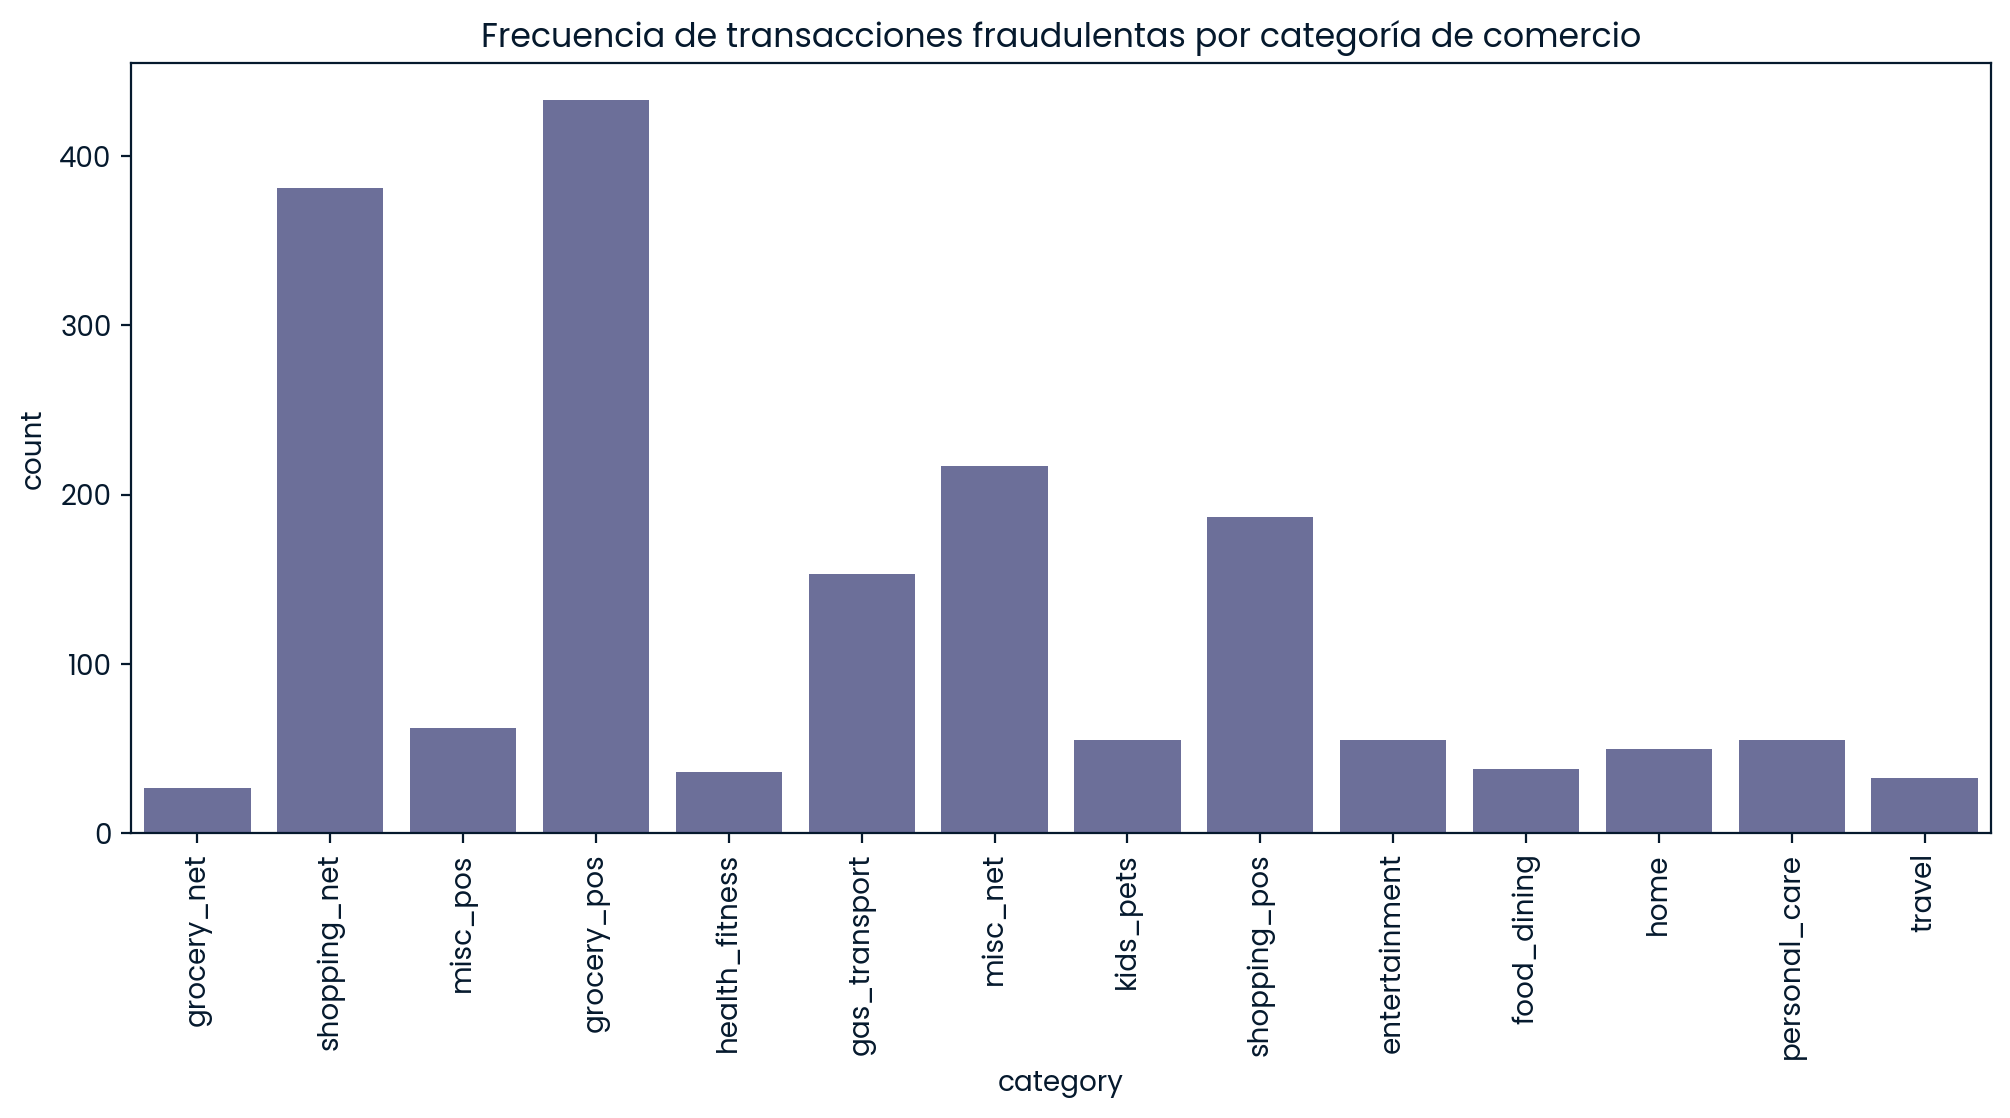

In [9]:
plt.figure(figsize=(12,5))
sns.countplot(x='category', data=df[df['is_fraud'] == 1])
plt.xticks(rotation=90)
plt.title('Frecuencia de transacciones fraudulentas por categoría de comercio')

Vemos que la mayor cantidad de fraudes se encuentran en las grocery_pos seguidos de los shopping_net

##  Monto promedio de transacción por fraude/no fraude

Text(0.5, 1.0, 'Monto de transacción según fraude')

<Figure size 800x500 with 0 Axes>

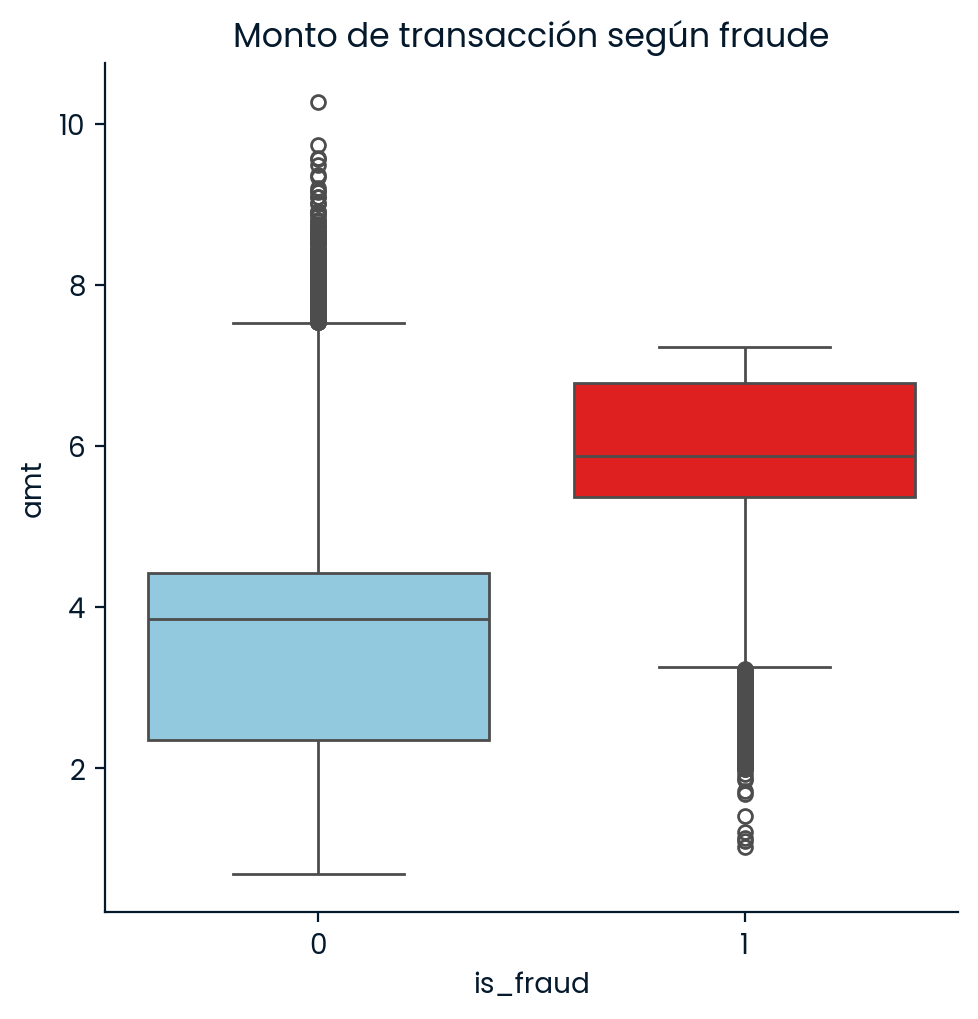

In [10]:
plt.figure(figsize=(8,5))
sns.catplot(
    x='is_fraud',
    y=np.log1p(df['amt']),
    data=df,
    kind='box',
    palette={'0': 'skyblue', '1': 'red'}  
)
plt.title('Monto de transacción según fraude')

Vemos que los casos de fraude son dan en cantidades de dineero grandes y que sus outliers son de valores pequeños , pasamos la cantidad de dinero a una escala logaritmica para que sea visible

## Lugares de trabajo donde ocurren mayor cantidad de fraudes

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Colour technologist'),
  Text(1, 0, 'Systems analyst'),
  Text(2, 0, 'Surveyor, minerals'),
  Text(3, 0, 'Surveyor, land/geomatics'),
  Text(4, 0, 'Naval architect'),
  Text(5, 0, 'Network engineer'),
  Text(6, 0, 'Human resources officer'),
  Text(7, 0, 'Research scientist (physical sciences)'),
  Text(8, 0, 'Engineer, biomedical'),
  Text(9, 0, 'Scientist, audiological')])

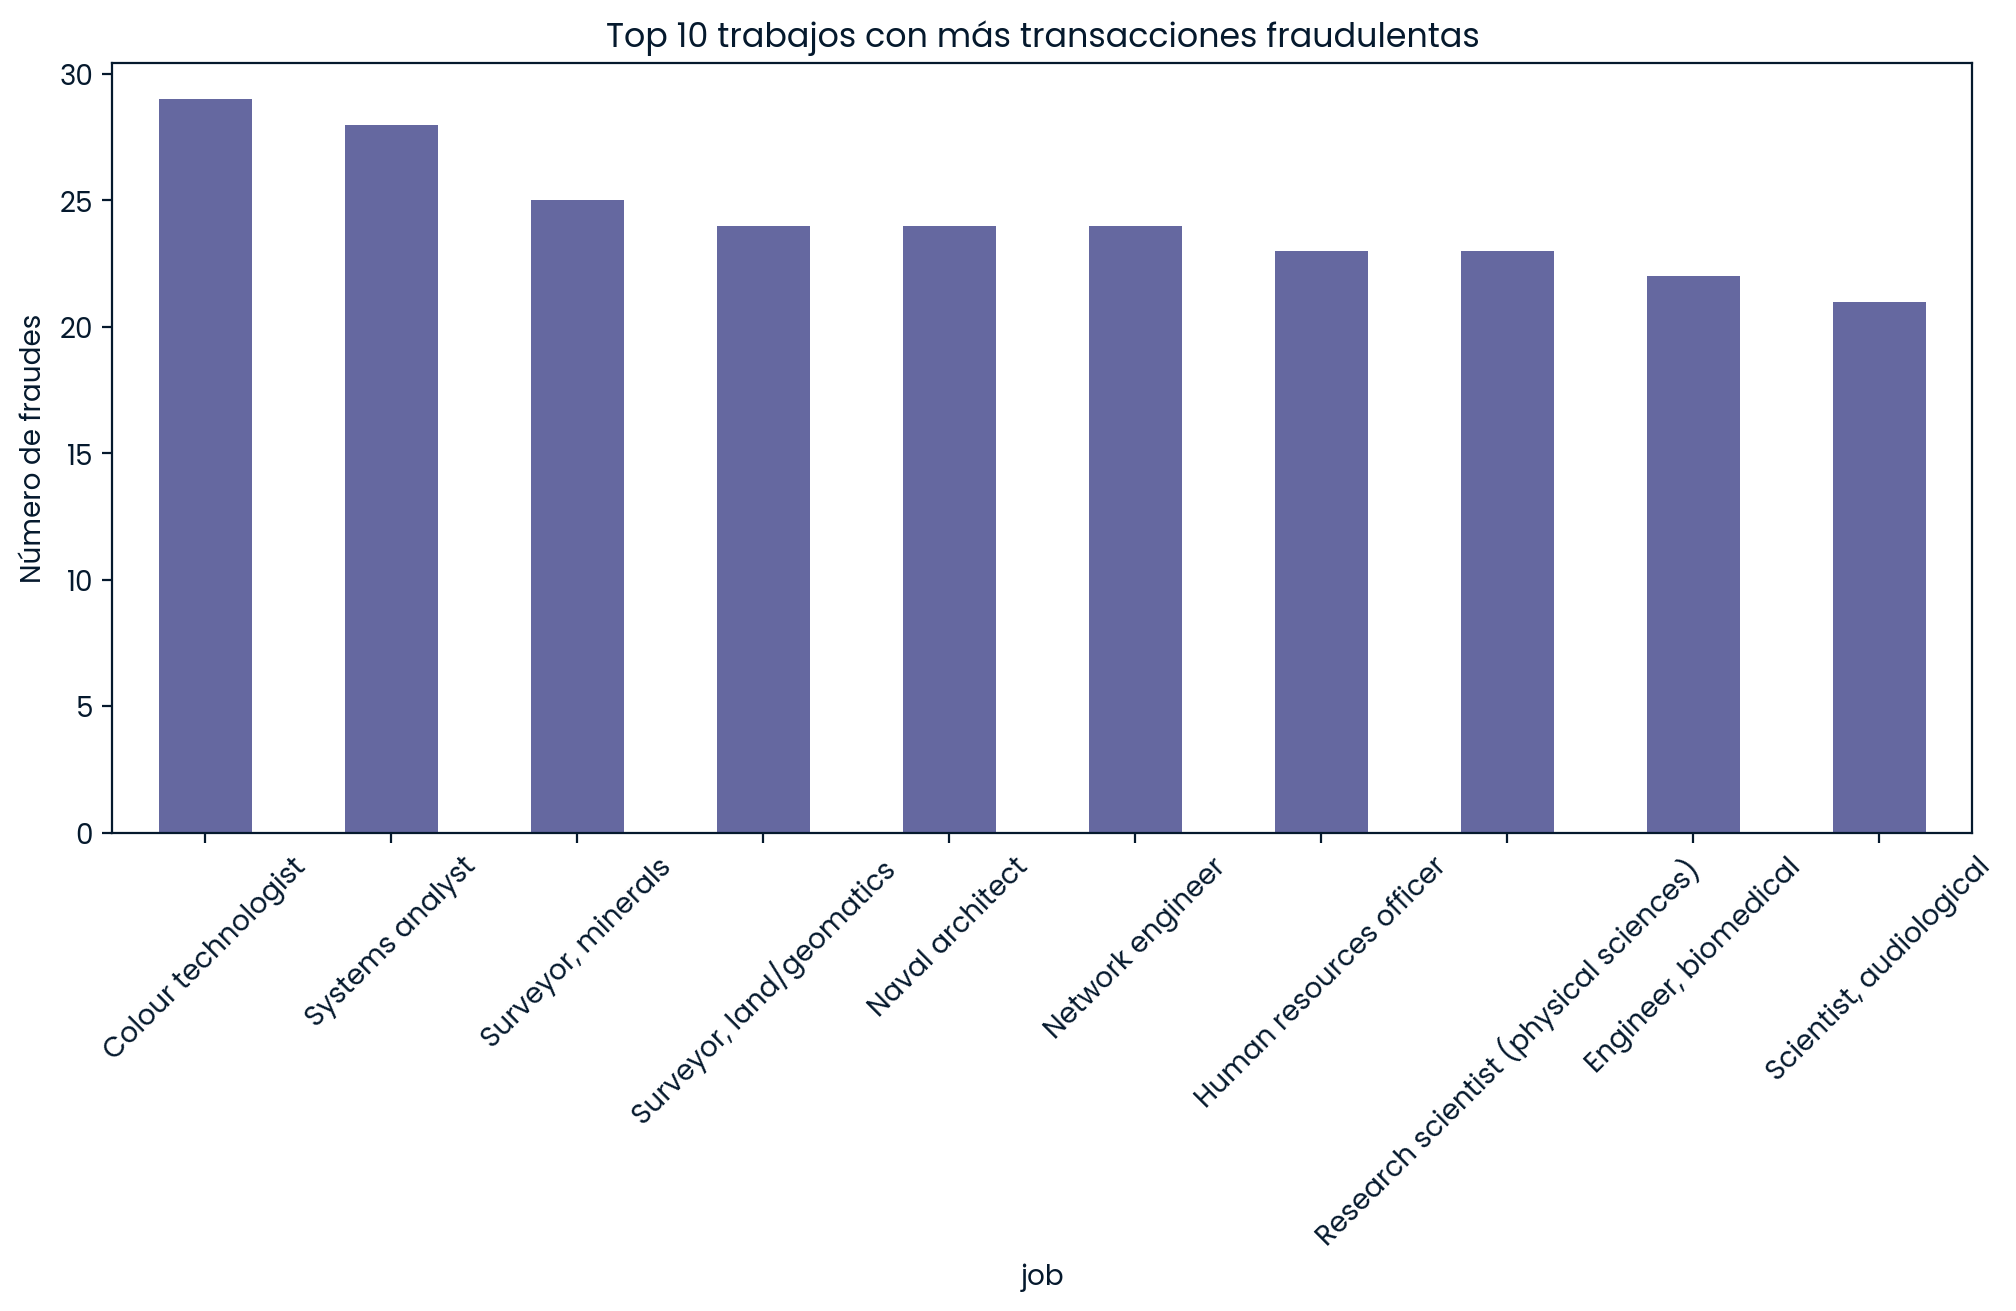

In [11]:
top_fraude_job = df[df['is_fraud'] == 1]['job'].value_counts().head(10)

plt.figure(figsize=(12,5))
top_fraude_job.plot(kind='bar')
plt.title('Top 10 trabajos con más transacciones fraudulentas')
plt.ylabel('Número de fraudes')
plt.xticks(rotation=45)

Notamos que colour tech es el lugar de trabajo donde se encontraron mas fraudes

## Cantidad de fraudes por estado

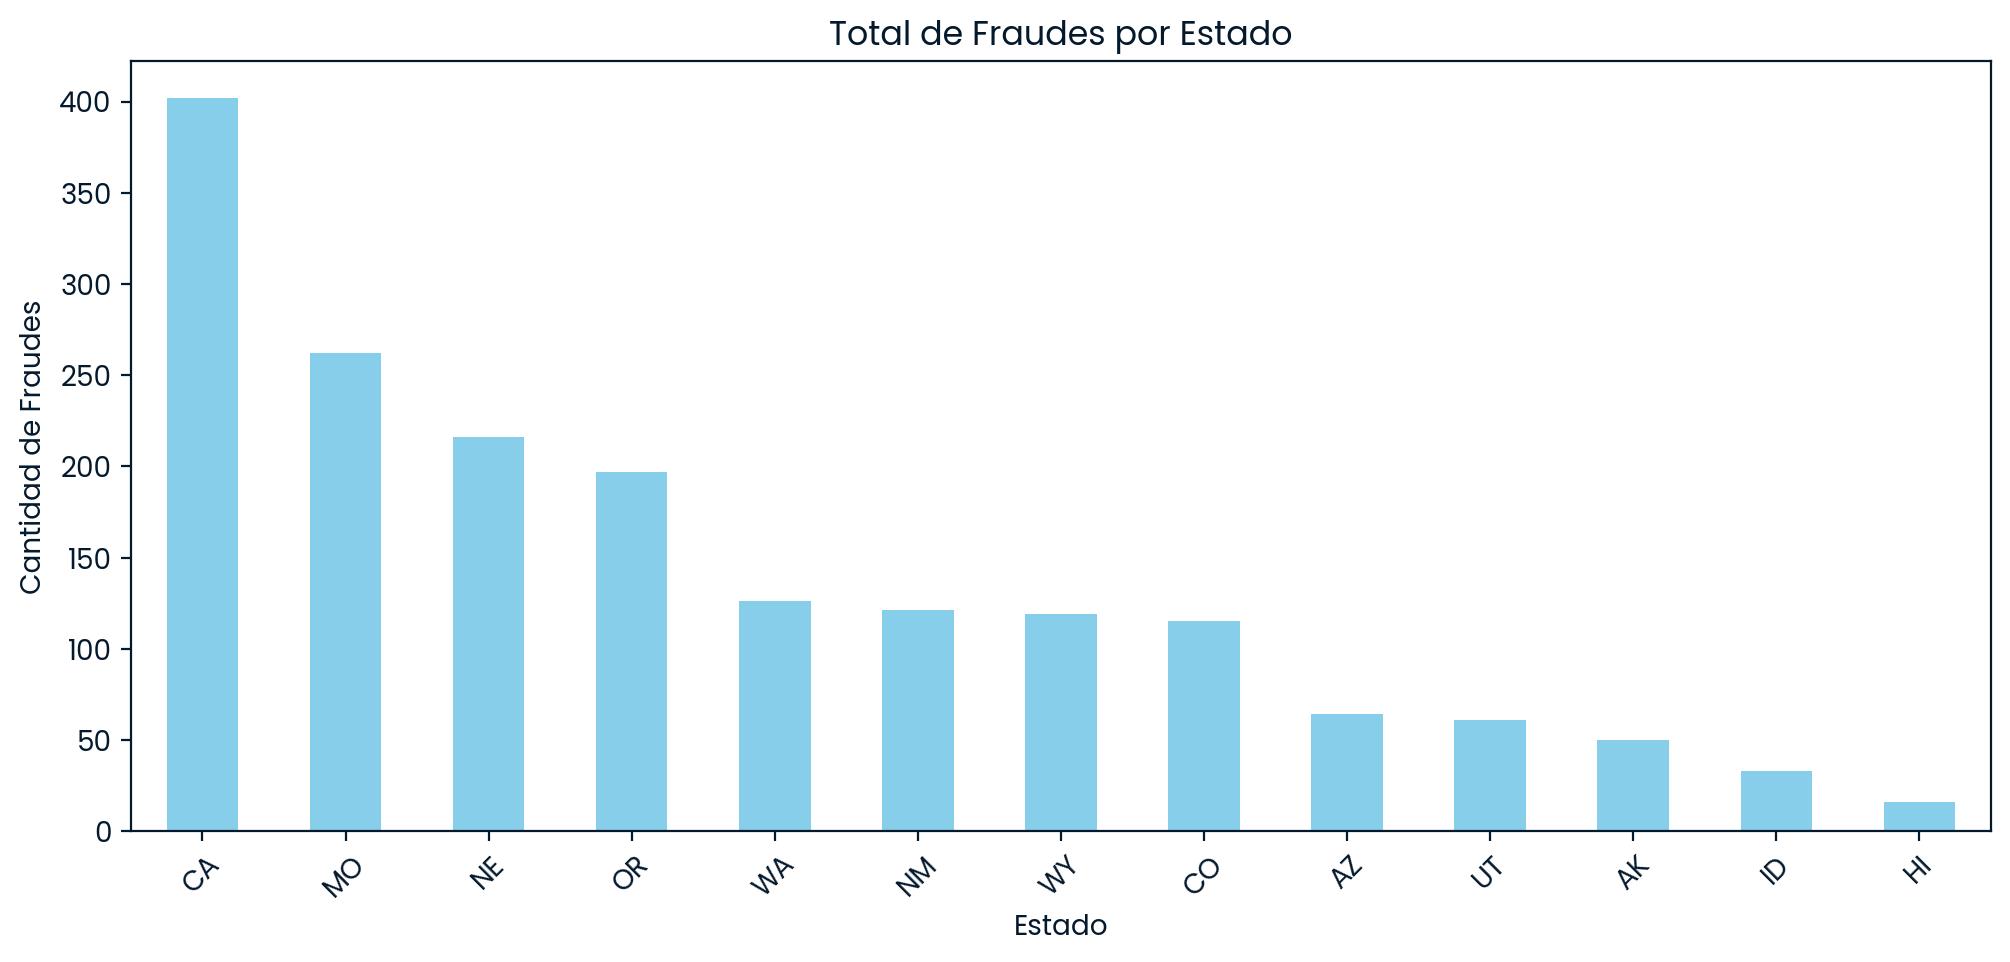

In [12]:
fraude_por_estado_total = df.groupby('state')['is_fraud'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 5))
fraude_por_estado_total.plot(kind='bar', color='skyblue')
plt.title('Total de Fraudes por Estado')
plt.ylabel('Cantidad de Fraudes')
plt.xlabel('Estado')
plt.xticks(rotation=45)
plt.show()

Notamos que el estado de California es el estado con mayor cantidad de fraudes 

## Top 10 ciudades con mayor cantidad de fraudes

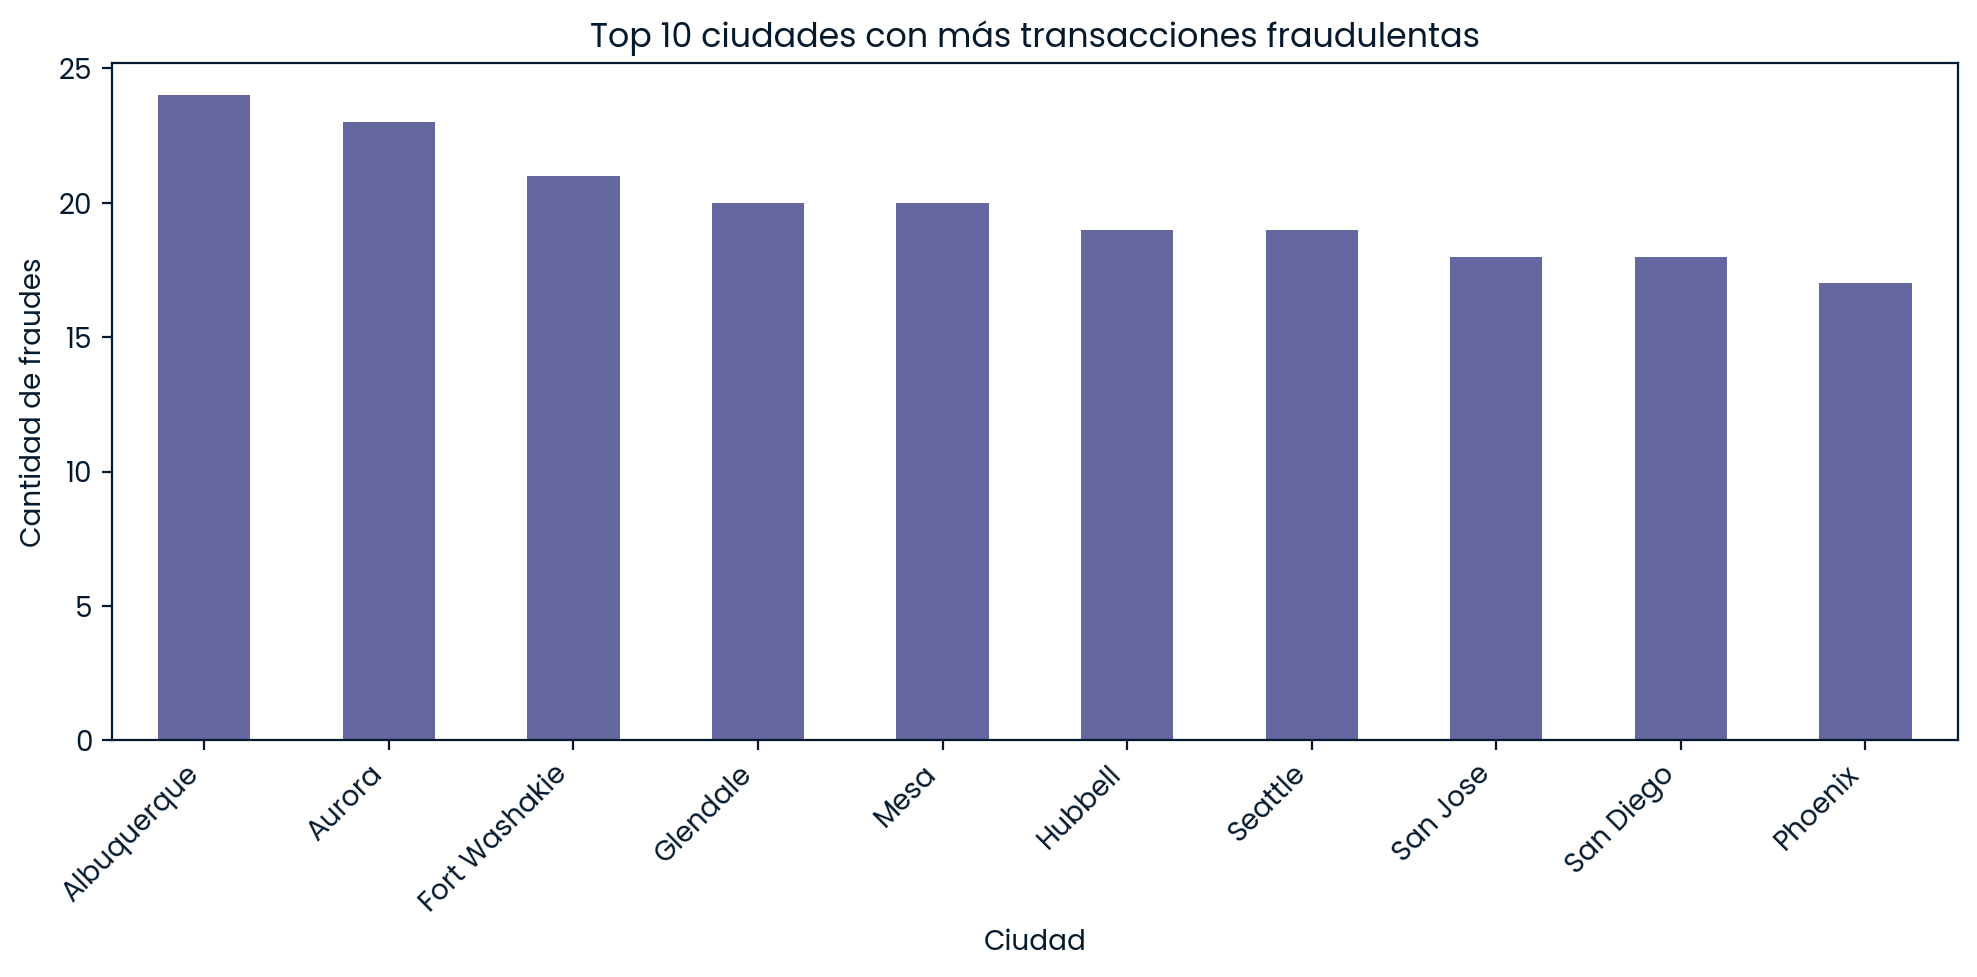

In [13]:
top_fraude_ciudades = df[df['is_fraud'] == 1]['city'].value_counts().head(10)

plt.figure(figsize=(10,5))
top_fraude_ciudades.plot(kind='bar')
plt.title('Top 10 ciudades con más transacciones fraudulentas')
plt.ylabel('Cantidad de fraudes')
plt.xlabel('Ciudad')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Albuquerque es la ciudad con mayor cantidad de fraudes y Phoenix la ciudad con menos fraudes

Text(0.5, 1.0, 'Distribución de edad')

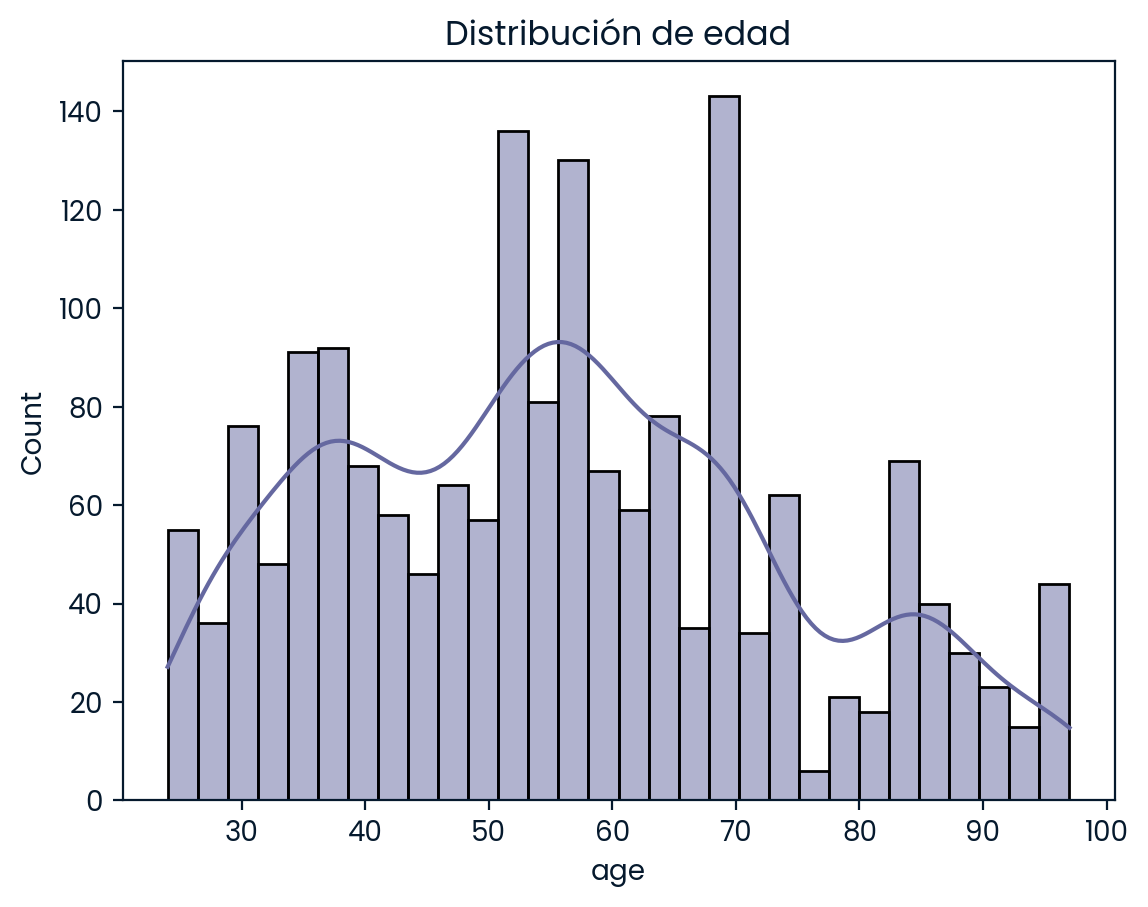

In [14]:
df['age'] = (pd.to_datetime('today') - df['dob']).dt.days // 365
sns.histplot( x='age', data=df[df['is_fraud'] == 1] , bins=30, kde=True, multiple='stack')
plt.title('Distribución de edad')

Notamos que entre los 50 y 70 años son las edades donde hay mas fraudes

## Cantidad de fraudes por hora

Text(0.5, 1.0, 'Fraude por hora del día')

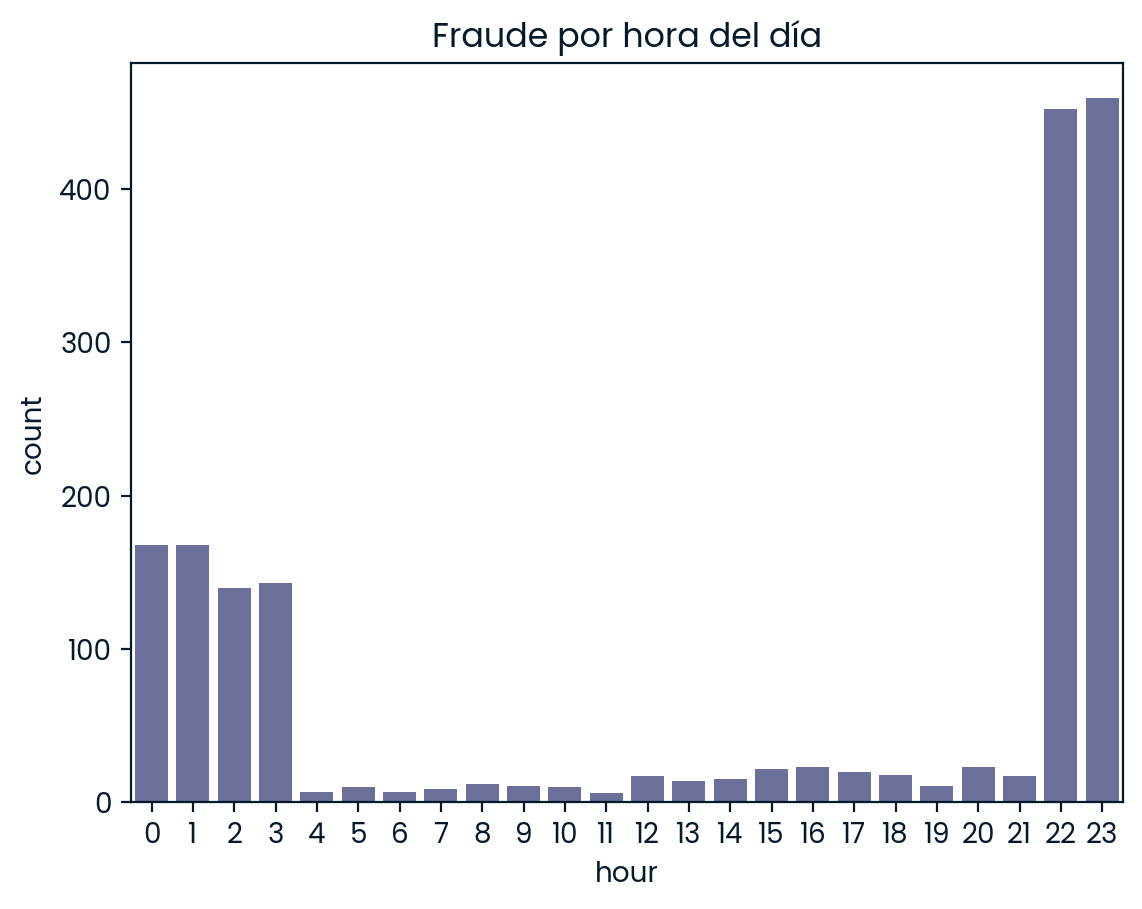

In [15]:
df['hour'] = df['trans_date_trans_time'].dt.hour
df['day_of_week'] = df['trans_date_trans_time'].dt.day_name()
sns.countplot(x='hour', data=df[df['is_fraud'] == 1])
plt.title('Fraude por hora del día')

Vemos que los fraudes se realizan mayormente en altas horas de la noche

## Cantidad de fraudes por dia de la semana

Text(0.5, 1.0, 'Fraude por día de la semana')

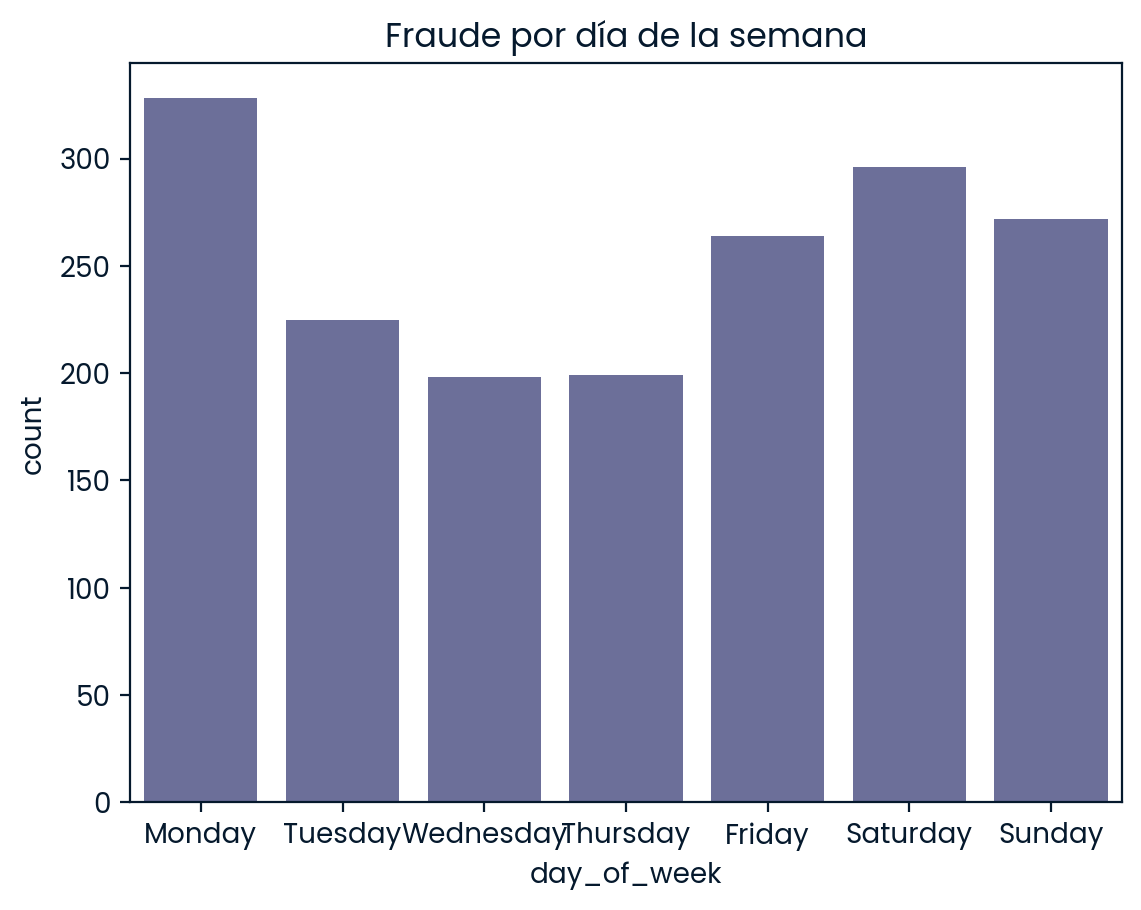

In [16]:
sns.countplot(x='day_of_week', data=df[df['is_fraud'] == 1], order=[
    'Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title('Fraude por día de la semana')

Los lunes son los dias con mayor cantidad de fraudes y los miercoles los dias con menor cantidad de fraudes

# Modelo

El modelo Random Forest es ideal para la detección de fraude en tarjetas de crédito debido a su capacidad para manejar datos desbalanceados y relaciones no lineales. Su robustez contra el sobreajuste y su capacidad para manejar grandes volúmenes de datos lo hacen eficiente en este tipo de problemas. Además, proporciona importancia de características, lo que permite identificar qué variables influyen más en la predicción, y genera probabilidades que facilitan la adaptación a diferentes umbrales de decisión. Su versatilidad con datos numéricos y categóricos, junto con su resistencia a datos faltantes, lo convierte en una opción sólida y escalable para este caso.



[[337423    402]
 [  1133    649]]


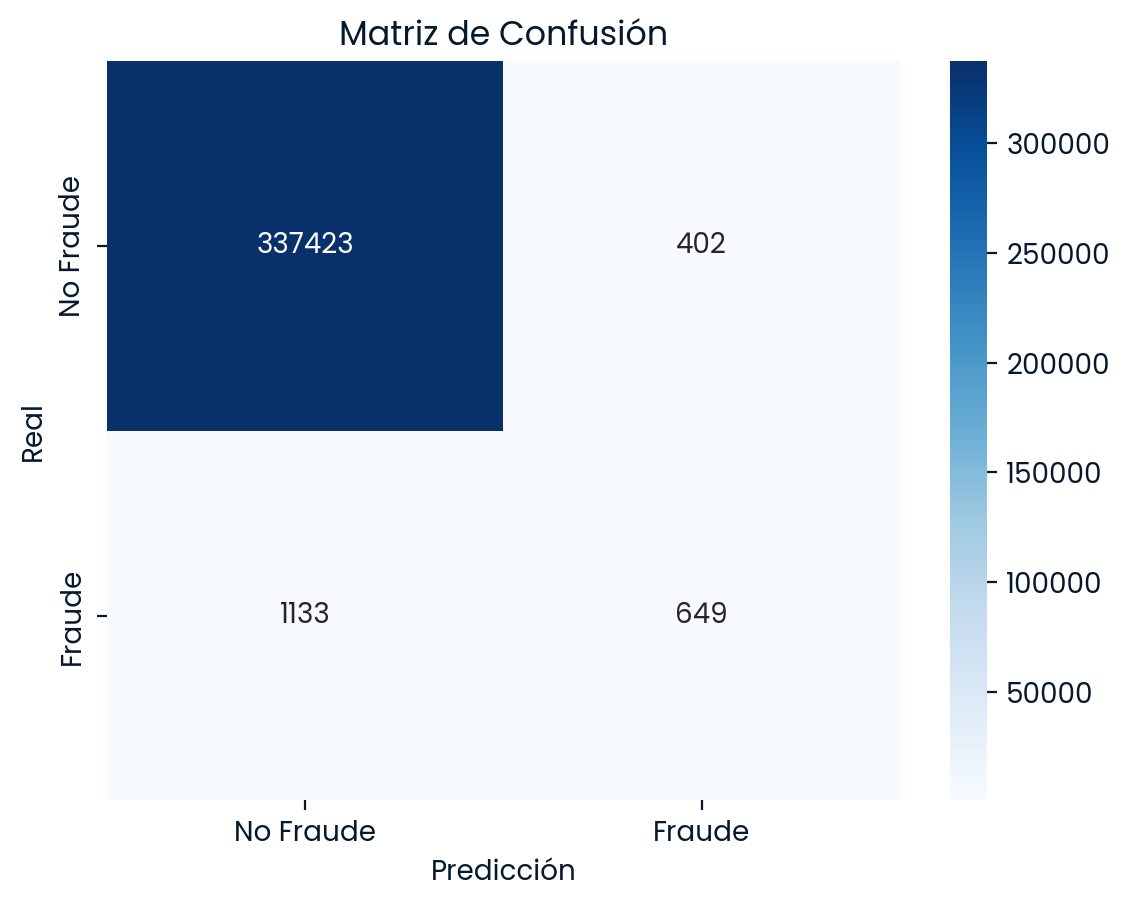

In [17]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier

# Seleccionar características (features) y etiqueta (target)
features = ['amt', 'city_pop', 'age', 'category', 'job']
X = df[features]
y = df['is_fraud']

# Crear un transformador para convertir las variables categóricas en variables numéricas (One-Hot Encoding)
# y normalizar las variables numéricas (como 'amt', 'city_pop' y 'age')
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['amt', 'city_pop', 'age']),  # Escalamos las características numéricas
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['category', 'job'])  # One-Hot Encoding para las características categóricas
    ])

# Crear un pipeline con el preprocesamiento y el modelo
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42))
])

# Realizar predicciones con validación cruzada usando cross_val_predict
y_pred = cross_val_predict(pipeline, X, y, cv=10)

# Matriz de confusión
conf_matrix = confusion_matrix(y, y_pred)

# Mostrar la matriz de confusión
print(conf_matrix)

# Visualización de la matriz de confusión
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Fraude", "Fraude"], yticklabels=["No Fraude", "Fraude"])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()


## Metricas

In [18]:
from sklearn.metrics import classification_report, confusion_matrix, balanced_accuracy_score, precision_score, recall_score, f1_score, accuracy_score

# Calcular todas las métricas
accuracy = accuracy_score(y, y_pred)
balanced_acc = balanced_accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)

# Imprimir las métricas
print(f"Accuracy: {accuracy:.4f}")
print(f"Balanced Accuracy: {balanced_acc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.9955
Balanced Accuracy: 0.6815
Precision: 0.6175
Recall: 0.3642
F1 Score: 0.4582


Aunque el modelo tiene una accuracy alta (0.9955), no está detectando bien los fraudes, ya que la balanced accuracy es más baja (0.6815). La precision (61.75%) indica que de lo que predijo como fraude, solo un 61.75% es correcto, lo que no es tan malo. El recall (36.42%) es bajo, lo que significa que solo detecta una pequeña parte de los fraudes reales. El F1 Score (0.4582) muestra que el modelo está fallando en encontrar un buen equilibrio entre precisión y recall. En resumen, el modelo necesita mejorar en detectar más fraudes, aunque no esté cometiendo demasiados falsos positivos.